In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Directory containing the data files
data_directory = '/Users/sirvartsarafian/Bikes/Data/all_data.csv'

# Load data covering full time period (9/2015 - 12/2019)
data = pd.read_csv(data_directory)

# Number of Rides per Year

/var/folders/h_/n6dblynd79jd_m09k1wg4cpr0000gn/T/ipykernel_13662/922655104.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Counts', data=yearly_counts, palette='viridis')


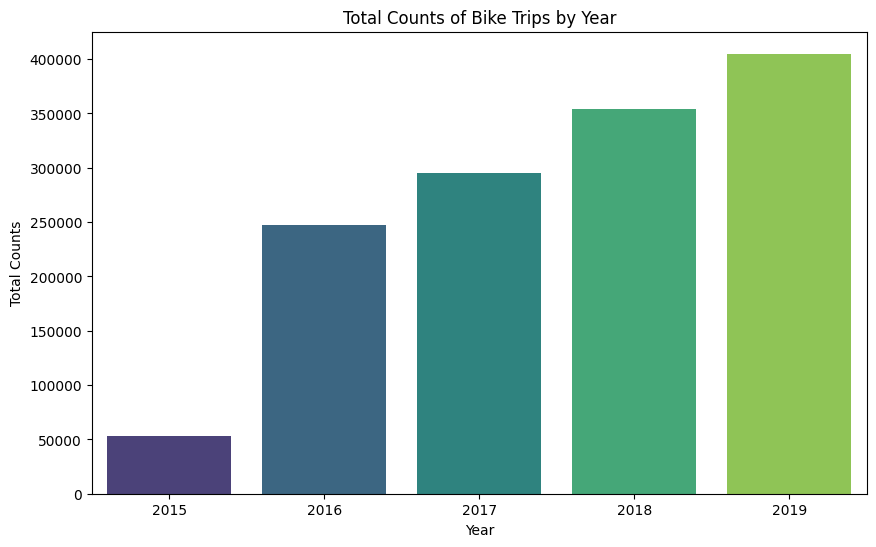

In [9]:
# Group the data by 'Year' and sum the counts
yearly_counts = data.groupby('Year').size()

# Reset index to convert the grouped data to a DataFrame
yearly_counts = yearly_counts.reset_index(name='Counts')

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Counts', data=yearly_counts, palette='viridis')
plt.title('Total Counts of Bike Trips by Year')
plt.xlabel('Year')
plt.ylabel('Total Counts')
plt.show()

# Number of Rides per Month per Year

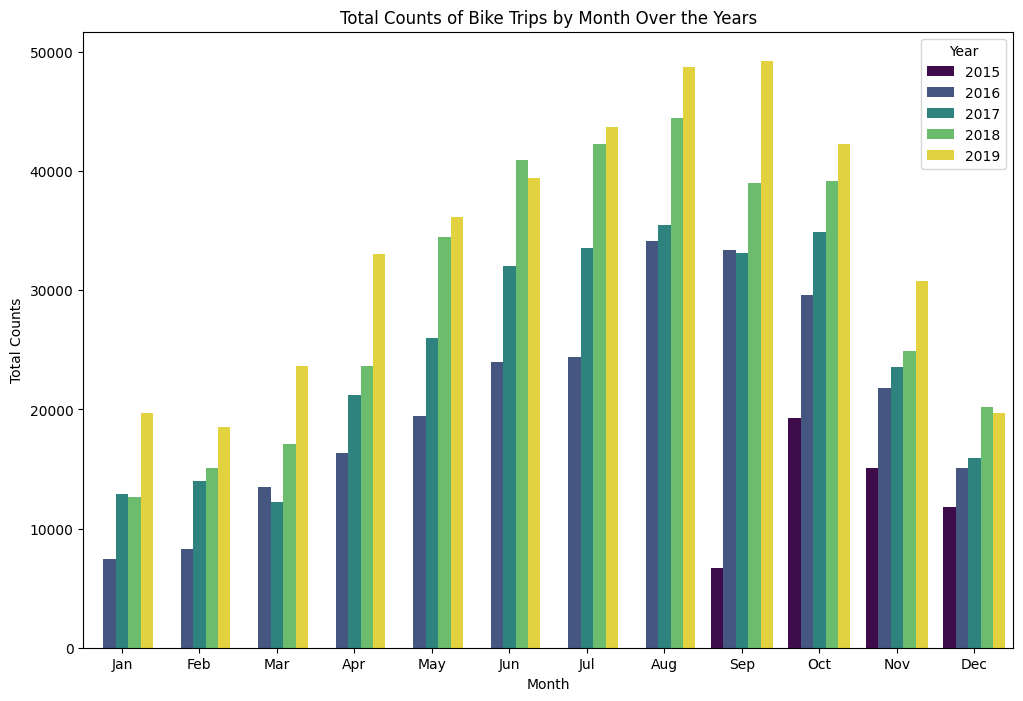

In [10]:
# Group the data by 'Year' and 'Month' and sum the counts
monthly_counts = data.groupby(['Year', 'Month']).size().reset_index(name='Counts')

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Counts', hue='Year', data=monthly_counts, palette='viridis')

# Set the order of the x-axis ticks and labels
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), months_order)

plt.title('Total Counts of Bike Trips by Month Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.legend(title='Year')
plt.show()

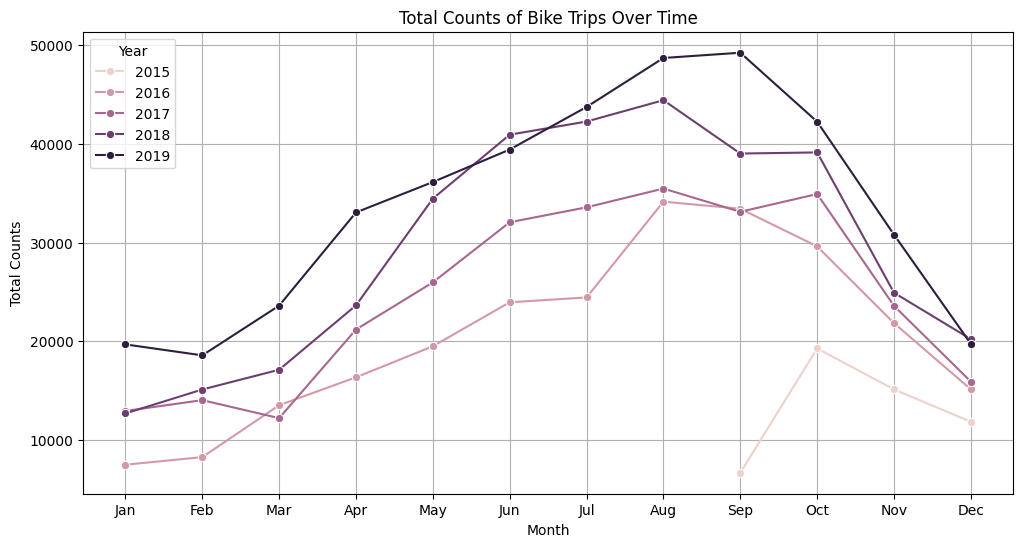

In [11]:
# Plot monthly counts for each year separately

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Counts', hue='Year', data=monthly_counts, marker='o')
plt.title('Total Counts of Bike Trips Over Time')
plt.xlabel('Month')
plt.ylabel('Total Counts')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

# Number of Rides per Day

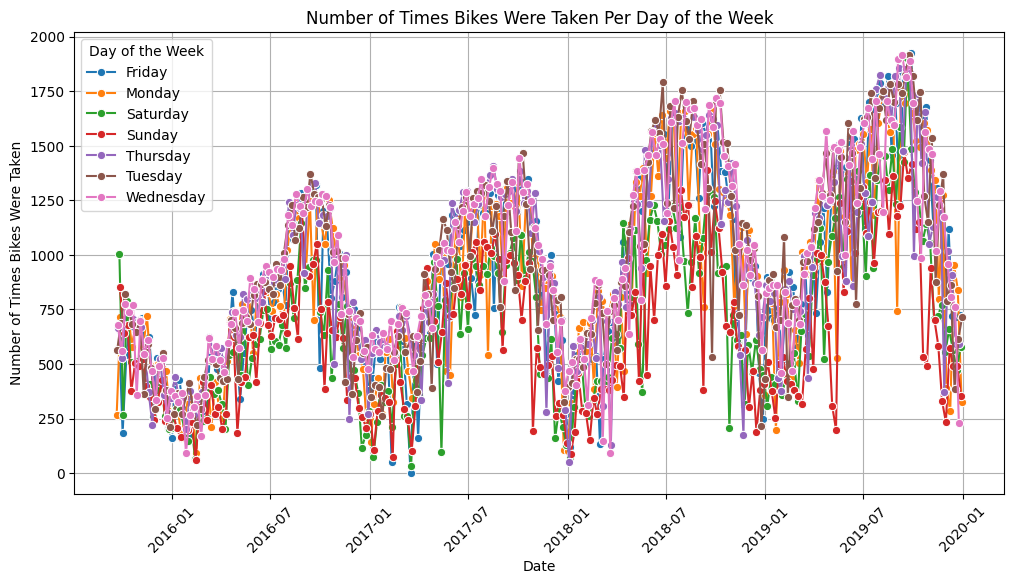

In [12]:
# Assuming 'data' DataFrame already contains the necessary columns

# Convert 'Date' column to datetime type if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Extract day of the week from the 'Date' column
data['Day_of_Week'] = data['Date'].dt.day_name()

# Group the data by both 'Day_of_Week' and 'Date' and count occurrences
daily_bike_counts = data.groupby(['Day_of_Week', 'Date']).size().reset_index(name='Count')

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Count', data=daily_bike_counts, hue='Day_of_Week', marker='o')
plt.title('Number of Times Bikes Were Taken Per Day of the Week')
plt.xlabel('Date')
plt.ylabel('Number of Times Bikes Were Taken')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week')
plt.grid(True)
plt.show()

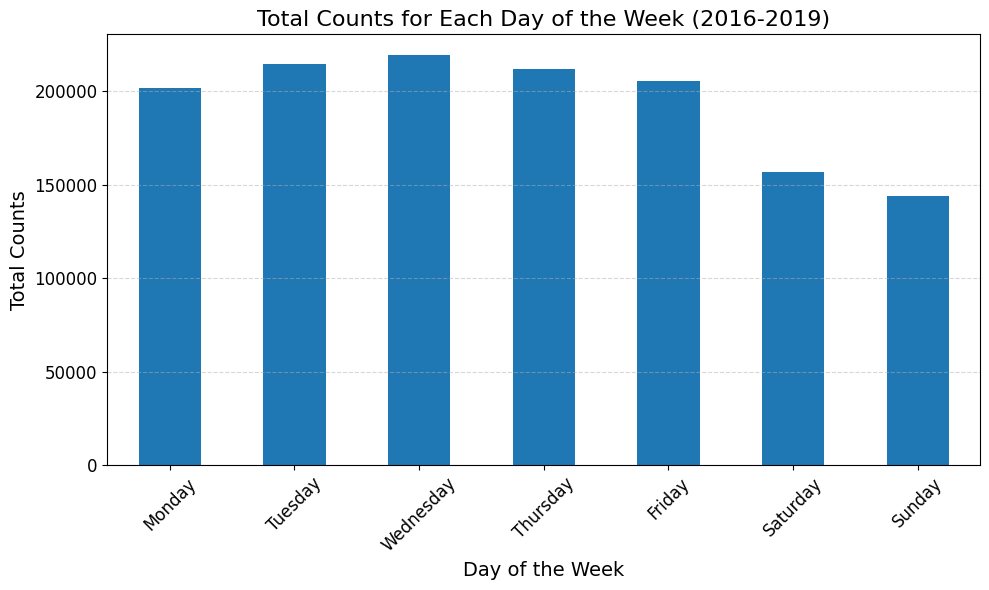

In [17]:
# Define custom colors for the bar plot
#colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue', 'plum', 'lightgray']
day_counts = data['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plot the bar plot with custom colors and adjust other parameters
plt.figure(figsize=(10, 6))
day_counts.plot(kind='bar') #,color=colors)
plt.title('Total Counts for Each Day of the Week (2016-2019)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)
plt.xticks(range(7), day_names, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

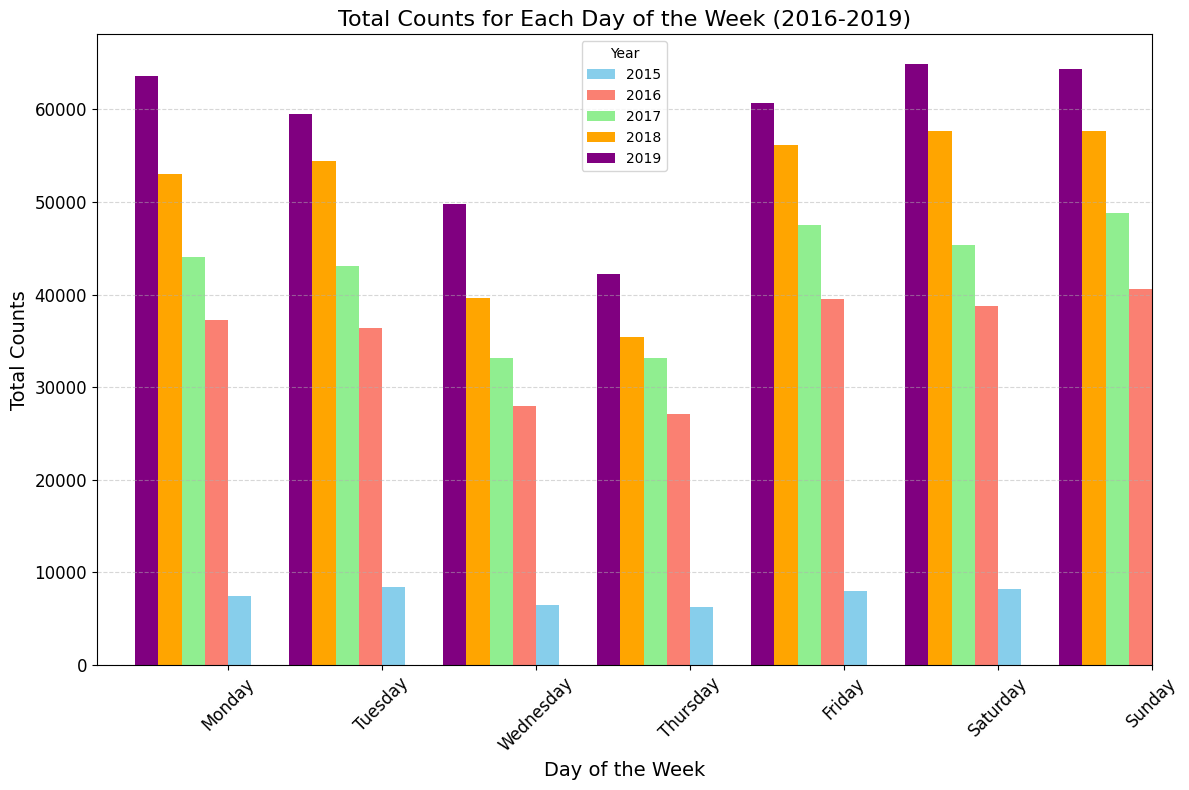

In [18]:
# Create a list of years
years = sorted(data['Year'].unique())

# Set custom colors for each year
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

# Plot the multi-bar chart
plt.figure(figsize=(12, 8))

for i, year in enumerate(years):
    # Filter data for the current year
    year_data = data[data['Year'] == year]
    
    # Group the filtered data by 'Day_of_Week' and count occurrences of each day
    day_counts = year_data['Day_of_Week'].value_counts().sort_index()
    
    # Plot the bar plot for the current year
    day_counts.plot(kind='bar', color=colors[i], position=i, width=0.15, align='center', label=year)

plt.title('Total Counts for Each Day of the Week (2016-2019)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)
plt.xticks(range(7), day_names, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bikes taken per hour 

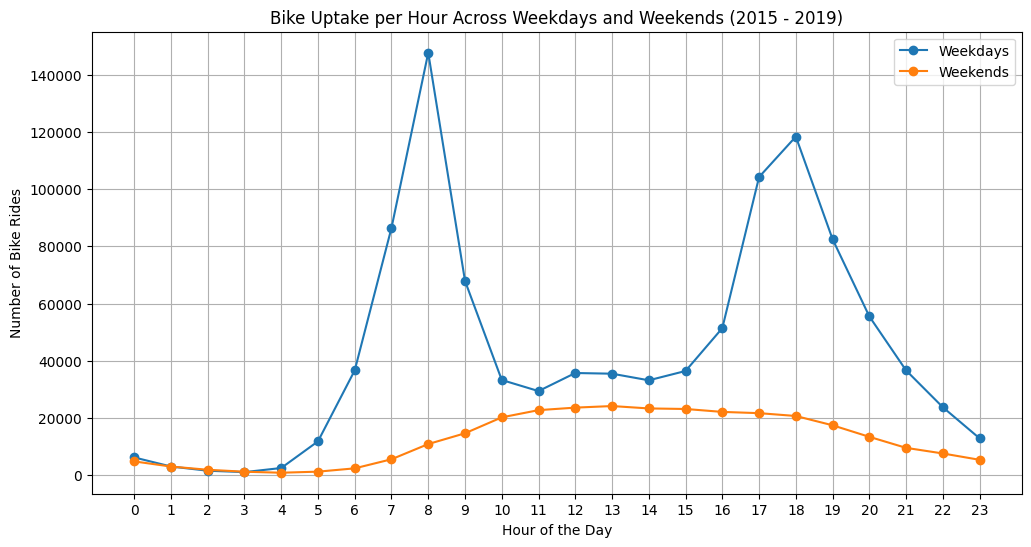

In [20]:
# Convert 'Start Time' column to datetime type
data['Start Time'] = pd.to_datetime(data['Start Time'])

# Extract the hour from the 'Start Time' column
data['Hour'] = data['Start Time'].dt.hour

# Map day names to numerical values
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Convert 'Day_of_Week' column to numerical values
data['Day_of_Week_Num'] = data['Day_of_Week'].map(day_mapping)

# Separate data for weekdays and weekends
weekdays_data = data[data['Day_of_Week_Num'] < 5]  # Monday to Friday (0 to 4)
weekends_data = data[data['Day_of_Week_Num'] >= 5]  # Saturday and Sunday (5 and 6)

# Group data by hour for weekdays and weekends
weekday_counts = weekdays_data.groupby('Hour').size()
weekend_counts = weekends_data.groupby('Hour').size()

# Plot the line graph for both weekdays and weekends
plt.figure(figsize=(12, 6))
plt.plot(weekday_counts.index, weekday_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_counts.index, weekend_counts.values, label='Weekends', marker='o')

# Add labels and title
plt.title('Bike Uptake per Hour Across Weekdays and Weekends (2015 - 2019)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.xticks(range(24))
plt.legend()
plt.grid(True)

# Show plot
plt.show()


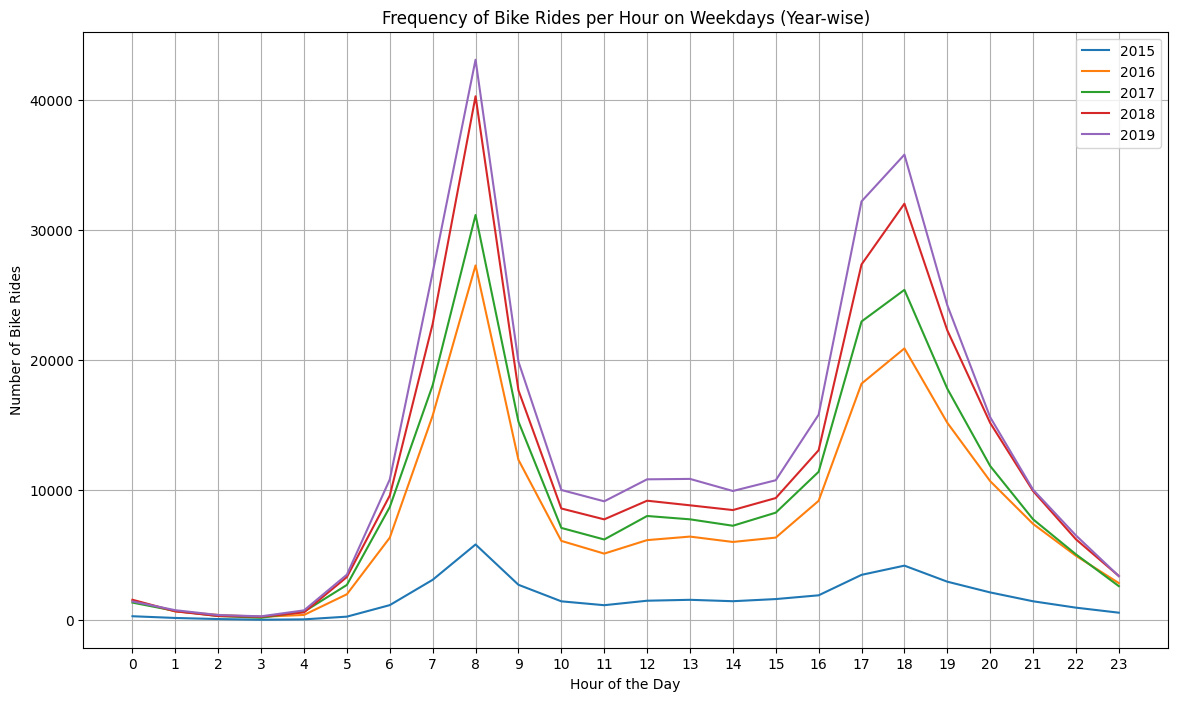

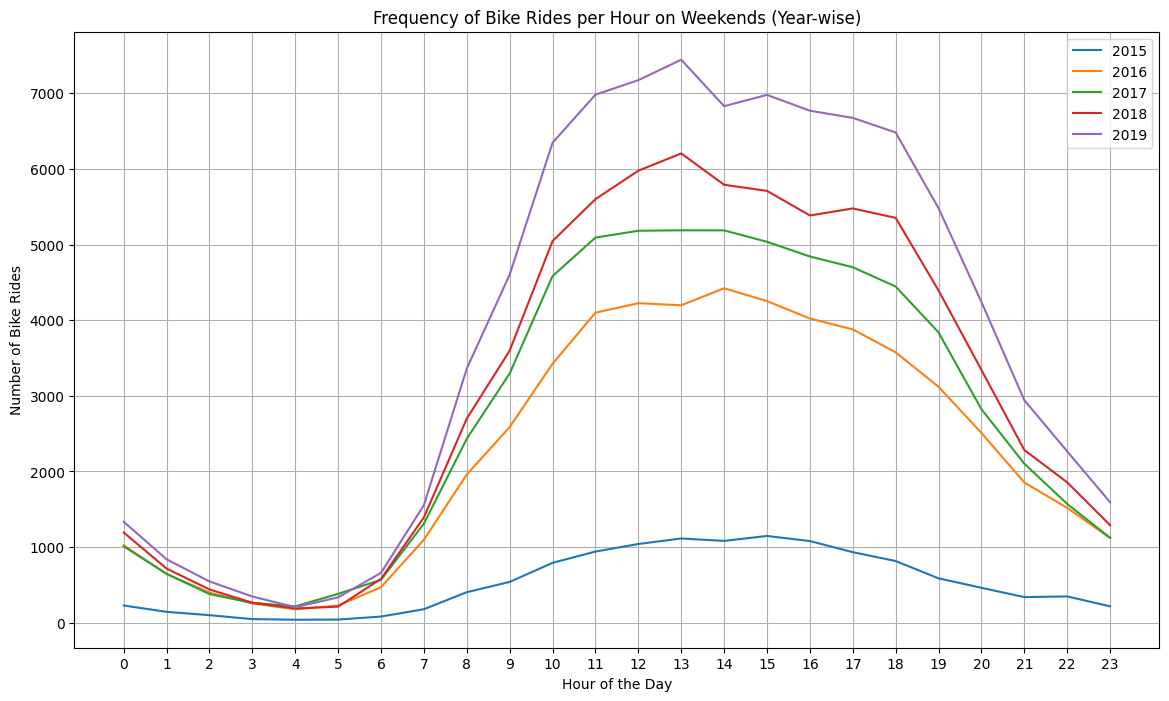

In [21]:
# Convert 'Start Time' to datetime
data['Start Time'] = pd.to_datetime(data['Start Time'])

# Extract year, month, day of the week, and hour
data['Year'] = data['Start Time'].dt.year
data['Month'] = data['Start Time'].dt.month
data['Day_of_Week'] = data['Start Time'].dt.dayofweek
data['Hour'] = data['Start Time'].dt.hour

# Separate data for weekdays and weekends
weekdays_data = data[data['Day_of_Week'] < 5]  # Monday to Friday (0 to 4)
weekends_data = data[data['Day_of_Week'] >= 5]  # Saturday and Sunday (5 and 6)

# Group data by year, day of the week, and hour
weekday_counts = weekdays_data.groupby(['Year', 'Hour']).size().unstack()
weekend_counts = weekends_data.groupby(['Year', 'Hour']).size().unstack()

# Plot for weekdays
plt.figure(figsize=(14, 8))
for year in range(2015, 2020):  # Adjust the range based on your dataset
    plt.plot(weekday_counts.loc[year], label=str(year))

plt.title('Frequency of Bike Rides per Hour on Weekdays (Year-wise)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

# Plot for weekends
plt.figure(figsize=(14, 8))
for year in range(2015, 2020):  # Adjust the range based on your dataset
    plt.plot(weekend_counts.loc[year], label=str(year))

plt.title('Frequency of Bike Rides per Hour on Weekends (Year-wise)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

# Key Takeaways

- Bike uptake increases year on year
- There are seasonal cycles per year: higher uptake in summer, lower uptake in winter
- Weekday vs Weekends look very different. Weekday peak times are sharp: 8am and 6pm. Weekends